In [1]:
%matplotlib inline

import os
import numpy as np
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import shape

In [3]:
import os
print(os.getcwd())

C:\Users\M533\Assignment


In [7]:
# Load the AOI polygon
AOI_path = 'Data_files/Area_of_interest.shp'
AOI = gpd.read_file(AOI_path)

# Load the join polygon
join_path = "Data_files/ZonalStatsNDVI_habitatconnectivity.geojson"
join = gpd.read_file(join_path)

# Path to the clipped NDVI raster
ndvi_path = 'Data_files/clipped_ndvi.tif'

# Path to the habitat connectivity raster
hab_con_path="Data_files/hab_con_epsg2633.asc"

In [10]:
m=join.explore('mean_ndvi', cmap='RdYlGn')
m

In [4]:
import pyproj

# Define the UTM zone (e.g., UTM Zone 33N for Europe)
utm_zone = 33

# Create a UTM to latitude-longitude (WGS84) transformer
utm_to_wgs84 = pyproj.Transformer.from_crs(f'EPSG:326{utm_zone}', 'EPSG:4326', always_xy=True)

# Your provided UTM coordinates
utm_x, utm_y = center_lon, center_lat

# Convert to latitude and longitude
lon, lat = utm_to_wgs84.transform(utm_x, utm_y)

print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 40.89995038970218, Longitude: 16.52793000194325



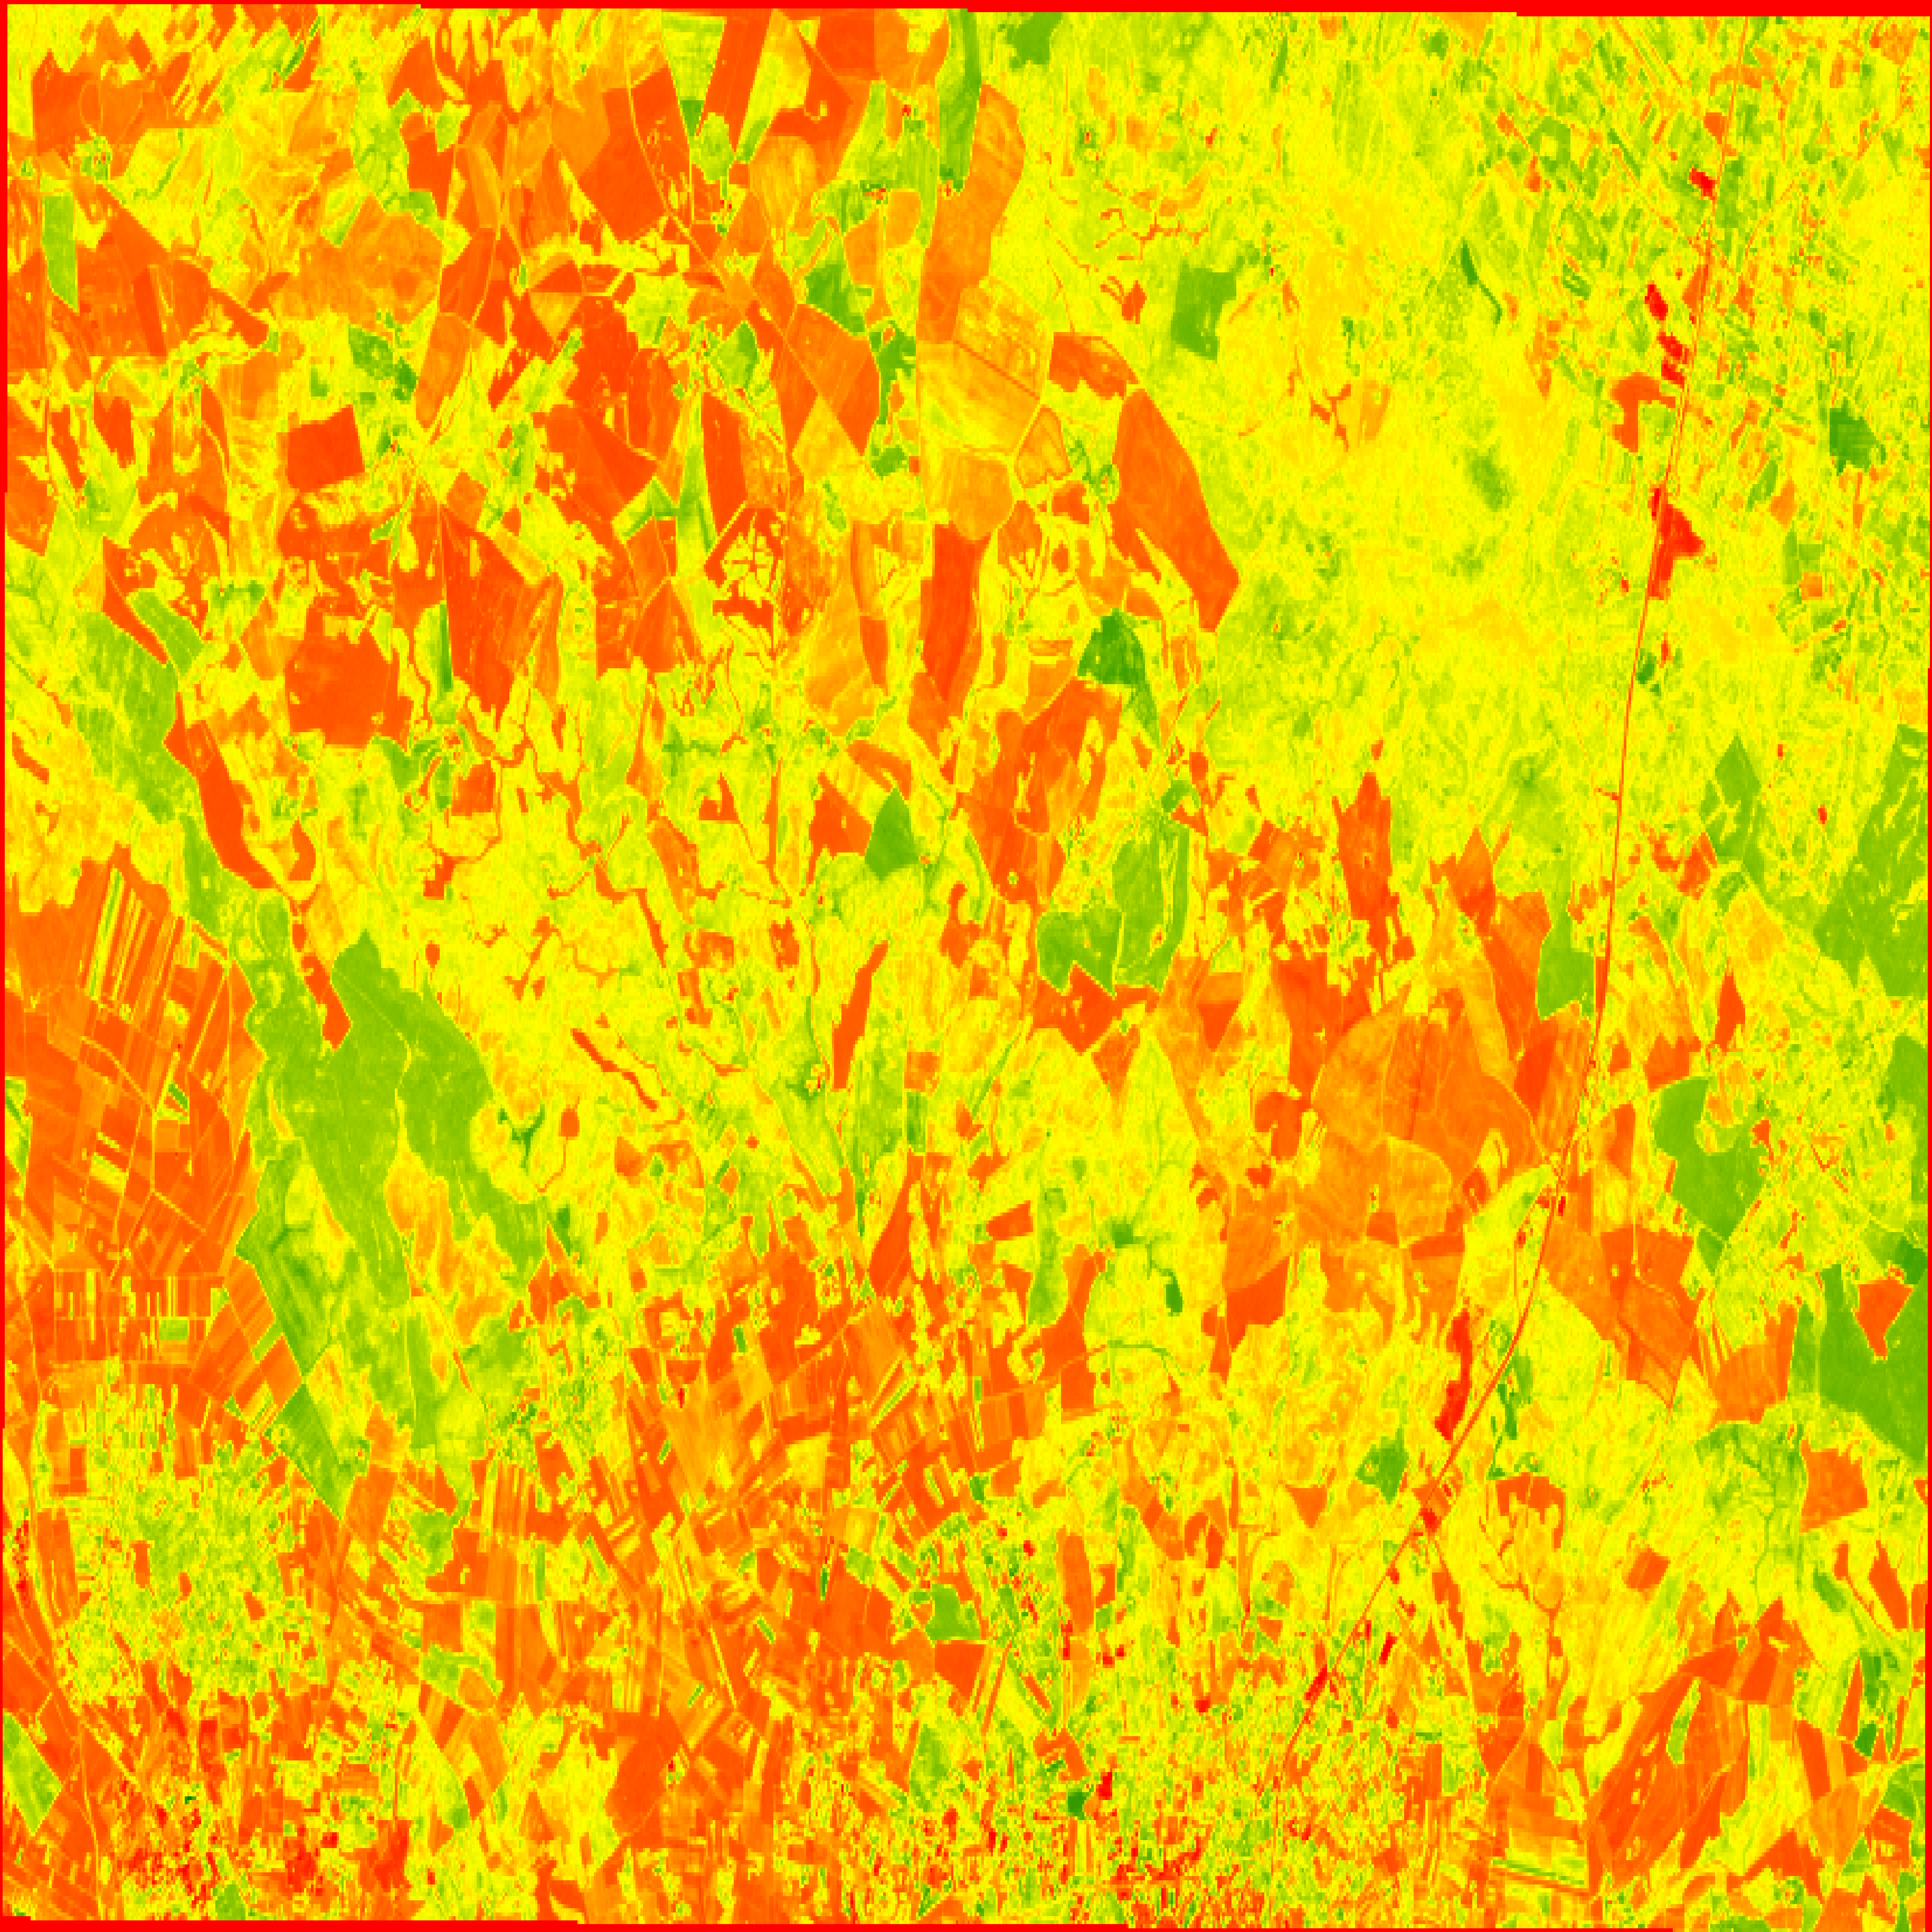

In [7]:
# Create a Folium map centered at a specific location (e.g., latitude, longitude)
m = folium.Map(location=[lat, lon], zoom_start=11, crs=ndvi_crs)

# Create a colormap for NDVI values
colormap = folium.LinearColormap(colors=["red", "yellow", "green"], vmin=0, vmax=1)

# Add the NDVI layer to the map
folium.raster_layers.ImageOverlay(
    image=ndvi_array,
    bounds=[[src.bounds.bottom, src.bounds.left], [src.bounds.top, src.bounds.right]],
    colormap=colormap,
).add_to(m)

m

In [ ]:
# Load the shapefile data using geopandas
shapefile_path = "shapefile.shp"
gdf = gpd.read_file(shapefile_path)

# Add the shapefile data as a GeoJSON overlay to the map
folium.GeoJson(gdf, name="Shapefile Overlay").add_to(m)

# Add a layer control to toggle the NDVI and shapefile layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save("ndvi_map.html")

print("NDVI map with shapefile overlay saved as ndvi_map.html")


In [ ]:
# Save the map to an HTML file
folium_map.save('Data_files/ndvi_with_shapefile_map.html')

In [ ]:
join.explore('DESC_', popup=True, legend=False, cmap='viridis')

In [ ]:
# Calculate the centroid of the area of interest
centroid = join.geometry.centroid
center_lat, center_lon = centroid.y.iloc[0], centroid.x.iloc[0]

import pyproj

# Define the UTM zone (e.g., UTM Zone 33N for Europe)
utm_zone = 33

# Create a UTM to latitude-longitude (WGS84) transformer
utm_to_wgs84 = pyproj.Transformer.from_crs(f'EPSG:326{utm_zone}', 'EPSG:4326', always_xy=True)

# Your provided UTM coordinates
utm_x, utm_y = center_lon, center_lat

# Convert to latitude and longitude
lon, lat = utm_to_wgs84.transform(utm_x, utm_y)

print(f"Latitude: {lat}, Longitude: {lon}")